In [1]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt
from environment import Individual, PairEnvironment

## Class Individual
Class `Individual` allows us to define objects which will represent the agents of our environment.
### Attributes
- `asp`: agent's level of aspiration  
- `don`: the next donation it will be giving when playing as a dictator  
- `payoff`: the last donation received  
- `my_donations`: a list of the consecutive donations it is being given  
- `my_aspirations`: a list of the consecutive aspirations it is updating when playing as a recipient

### Methods
- `is_envious`:  
- `is_free_rider`:  
- `stimuli`:  
- `update_asp`:  
- `update_payoff`:  
- `calculate_don`:  
- `calculate_stoch_don`:  
- `calculate_envious_don`:  
- `donation`:  
- `features_exchange`:  


## Class PairEnvironment
Class `PairEnvironment` allows us to define objects which will represent the pairs of agents interacting in our environment.
### Attributes
- `dictator`: Individual object representing the dictator   
- `recipient`: Individual object representing the recipient
### Methods
- `set_envious`:  
- `set_free_rider`:  
- `is_envious`:  
- `is_free_rider`:  
- `make_donation`:  
- `make_stoch_donation`:  
- `make_envious_donation`:  
- `make_freerider_donation`:  
- `swap_roles`:  
- `get_state`:  
- `ind_exchange`:

Total amount of endowment is fixed to one

In [2]:
random.seed(0)
np.random.seed(0)
end = 1.0
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
sp = 1
spi = 1
N = 500  # number of pairs
I = 50   # number of iterations
randomp = random.randint(0, N)

## Deterministic model

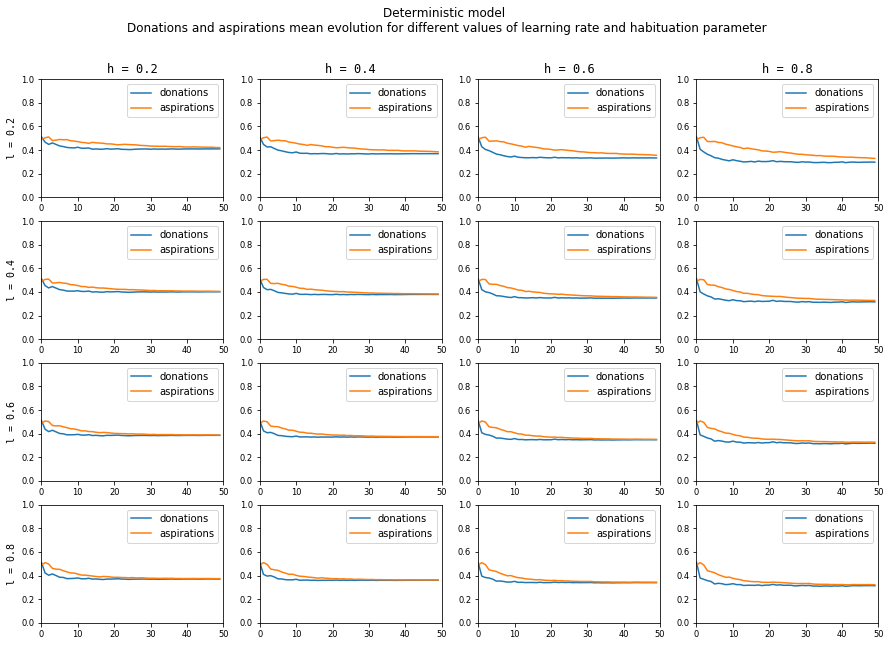

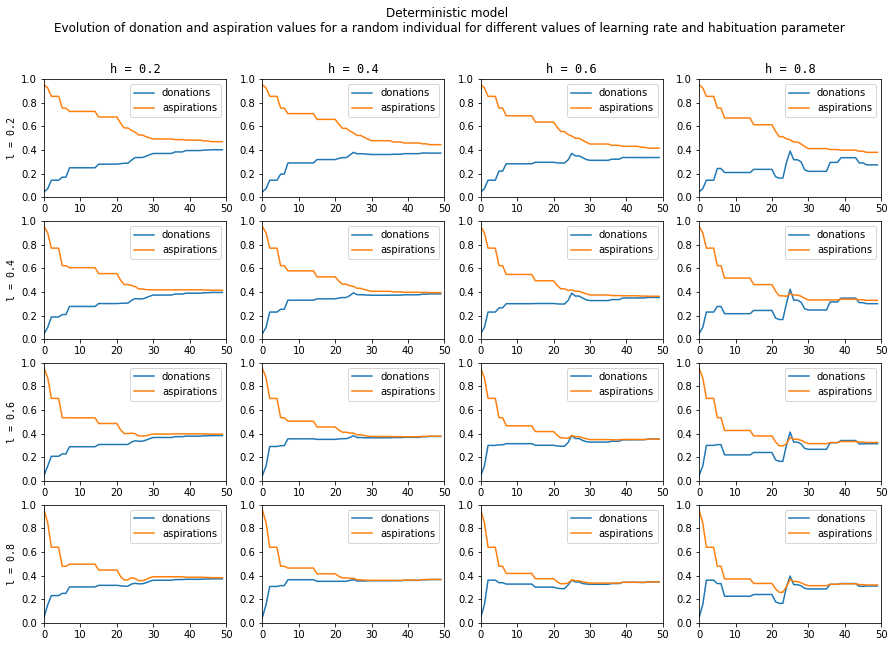

In [3]:
for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
		### Creating an environment with N pairs of individuals ###
		M = I	# number of iterations
		pairs = []
		for i in range(N):
			pairs.append(PairEnvironment())
			if( i == randomp ):
				pairs[i].set_random_ind(True)

		deterministic_donations = []	# List with all the donations for deterministic model
		deterministic_aspirations = []	# List with all the aspirations for deterministic model
		while( M > 0 ):
			don_mean = 0.0
			asp_mean = 0.0

			### STEP 1. Each pair make the donation ###
			for p in pairs:
				don_d, asp_d, don_r, asp_r = p.get_state(False)
				p.dictator.my_donations.append(don_d)		# me interesa la evolución de cada individuo de cada pareja así que todo esto lo guardo
				p.dictator.my_aspirations.append(asp_d)		# idem
				p.recipient.my_donations.append(don_r)		# idem
				p.recipient.my_aspirations.append(asp_r)	# idem
				don_mean += don_r
				asp_mean += asp_r
				p.make_donation(learn, habit)
			deterministic_donations.append(don_mean / N)		# todas las donaciones (en cada make_donation() sólo se actualiza la donación del recipient)
			deterministic_aspirations.append(asp_mean / N)		# todas las aspiraciones (en cada make_donation() sólo se actualiza la aspiración del recipient)

			### STEP 2. Shuffling the pairs and swapping the roles (inside ind_exchange) randomly ###
			exchanges = random.sample(range(N), N)
			index = list(range(N))
			for (i, j) in zip(exchanges, index):
				if (i == j):
					pairs[i].swap_roles()
					index.remove(i)
					exchanges.remove(i)
				else:
					pairs[i].ind_exchange(pairs[j])
					exchanges.remove(i)
					index.remove(i)
					exchanges.remove(j)
					index.remove(j)
			M -= 1

			### We go to STEP 1 again ###
            
        ########################################################
        ##########      Donation mean evolution      ###########
        ########################################################
            
		plt.figure(1, figsize=[15,10])
		plt.subplot(len(l), len(h), sp)
		sp += 1
		plt.plot(list(range(I)), deterministic_donations, label='donations')
		plt.plot(list(range(I)), deterministic_aspirations, label='aspirations')
		plt.axis([0, I, 0, 1])
		plt.xticks(fontsize='small')
		plt.yticks(fontsize='small')
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Deterministic model \nDonations and aspirations mean evolution for different values of learning rate and habituation parameter")

        
		########################################################
		#########  Donation and aspiration evolution  ##########
		#########       for a random individual       ##########
		########################################################
    
		for p in pairs:
			if(p.is_random_ind()): 
				random_pair = p
            
		donationsd = random_pair.dictator.my_donations
		aspirationsd = random_pair.dictator.my_aspirations
		plt.figure(2, figsize=[15,10])
		plt.subplot(len(l), len(h), spi)
		spi += 1
		plt.plot(list(range(I)), donationsd)
		plt.plot(list(range(I)), aspirationsd)
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.axis([0, I, 0, 1])
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Deterministic model \nEvolution of donation and aspiration values for a random individual for different values of learning rate and habituation parameter")

plt.show()

## Stochastic model

### Low 'trembling hand' parameter

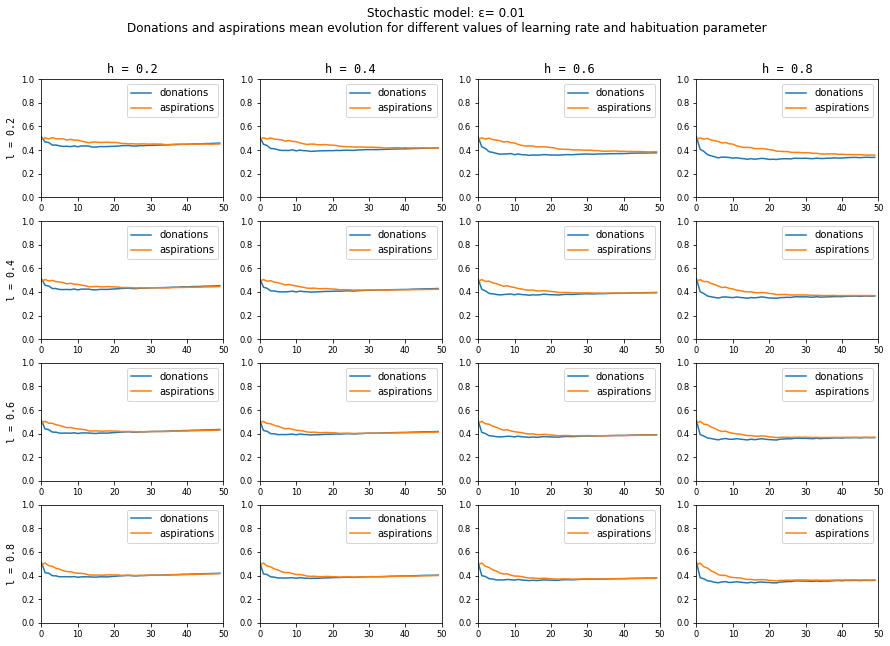

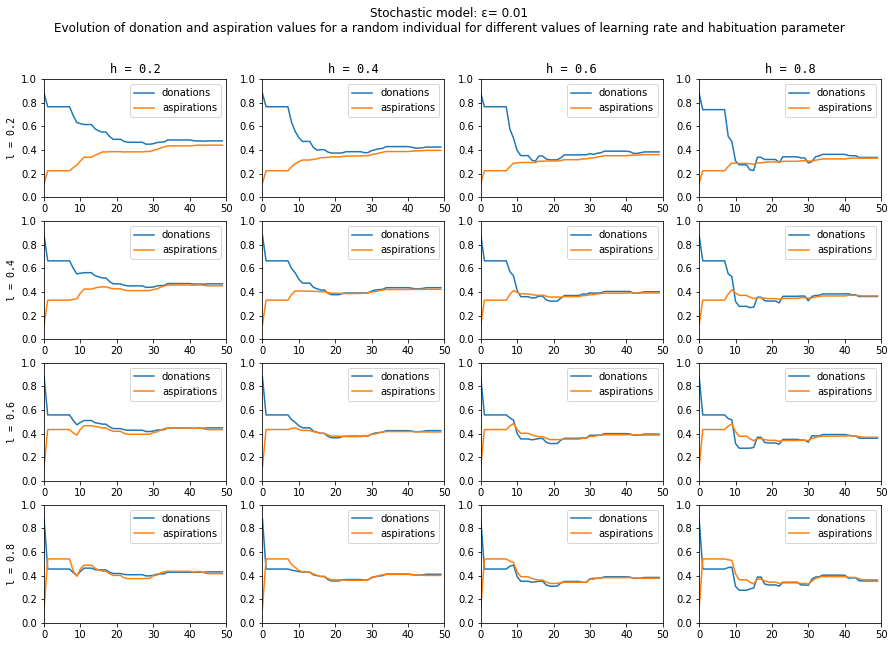

In [4]:
random.seed(0)
np.random.seed(0)
epsilon = 0.01  # 'trembling hand' parameter
end = 1.0
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
I = 50   # number of iterations
randomp =  random.randint(0, N)

sp = 1
spi = 1
for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
		### Creating an environment with N pairs of individuals ###
		M = I	# number of iterations
		pairs = []
		for i in range(N):
			pairs.append(PairEnvironment())
			if( i == randomp ):
				pairs[i].set_random_ind(True)

		stochastic_donations = []	# List with all the donations for stochastic model
		stochastic_aspirations = []	# List with all the aspirations for stochastic model

		while( M > 0 ):
			don_mean = 0.0
			asp_mean = 0.0

			### STEP 1. Each pair make the donation ###
            
			for p in pairs:
				don_d, asp_d, don_r, asp_r = p.get_state(False)
				p.dictator.my_donations.append(don_d)		# me interesa la evolución de cada individuo de cada pareja así que todo esto lo guardo
				p.dictator.my_aspirations.append(asp_d)		# idem
				p.recipient.my_donations.append(don_r)		# idem
				p.recipient.my_aspirations.append(asp_r)	# idem
				don_mean += don_r
				asp_mean += asp_r
				p.make_stoch_donation(learn, habit, epsilon)
			stochastic_donations.append(don_mean / N)		# todas las donaciones (en cada make_donation() sólo se actualiza la donación del recipient)
			stochastic_aspirations.append(asp_mean / N)		# todas las aspiraciones (en cada make_donation() sólo se actualiza la aspiración del recipient)

			### STEP 2. Shuffling the pairs and swapping the roles (inside ind_exchange) randomly ###
			exchanges = random.sample(range(N), N)
			index = list(range(N))

			for (i, j) in zip(exchanges, index):
				if (i == j):
					pairs[i].swap_roles()
					index.remove(i)
					exchanges.remove(i)
				else:
					pairs[i].ind_exchange(pairs[j])
					exchanges.remove(i)
					index.remove(i)
					exchanges.remove(j)
					index.remove(j)

			M -= 1

			### We go to STEP 1 again ###
            
        ########################################################
        ##############   Donation and aspiration ###############
        ##############      mean evolution       ###############
        ########################################################
            
		plt.figure(3, figsize=[15,10])
		plt.subplot(len(l), len(h), sp)
		sp += 1
		plt.plot(list(range(I)), stochastic_donations, label='donations')
		plt.plot(list(range(I)), stochastic_aspirations, label='aspirations')
		plt.axis([0, I, 0, 1])
		plt.xticks(fontsize='small')
		plt.yticks(fontsize='small')
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Stochastic model: \u03B5= "+str(epsilon)+"\nDonations and aspirations mean evolution for different values of learning rate and habituation parameter")

        
		########################################################
		#########  Donation and aspiration evolution  ##########
		#########       for a random individual       ##########
		########################################################
  
		for p in pairs:
			if(p.is_random_ind()): 
				random_pair = p
                
		donationss = random_pair.dictator.my_donations
		aspirationss = random_pair.dictator.my_aspirations
		plt.figure(4, figsize=[15,10])
		plt.subplot(len(l), len(h), spi)
		spi += 1
		plt.plot(list(range(I)), donationss)
		plt.plot(list(range(I)), aspirationss)
        
        
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.axis([0, I, 0, 1])
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Stochastic model: \u03B5= "+str(epsilon)+"\nEvolution of donation and aspiration values for a random individual for different values of learning rate and habituation parameter")

plt.show()


### Higher 'trembling hand' parameter

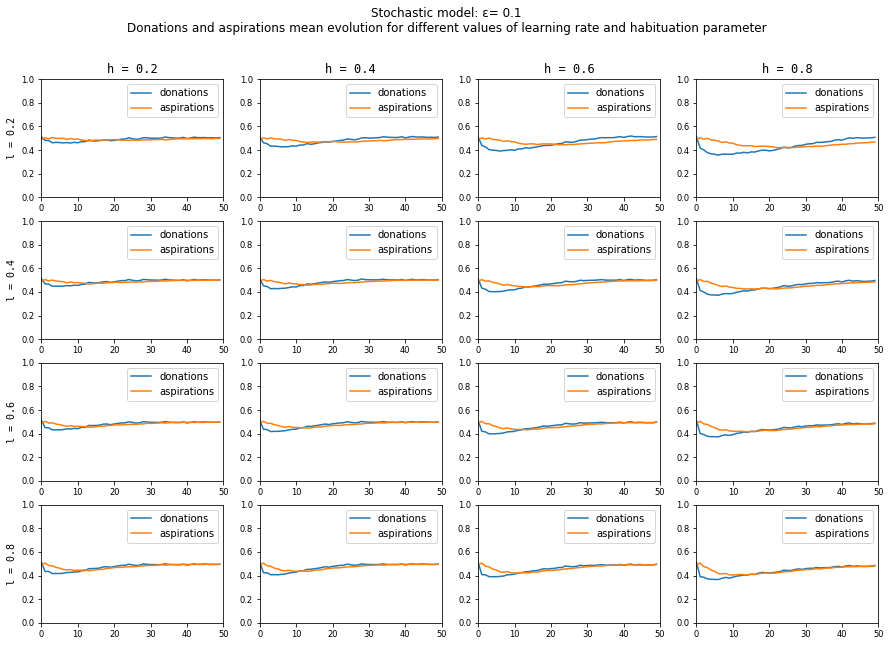

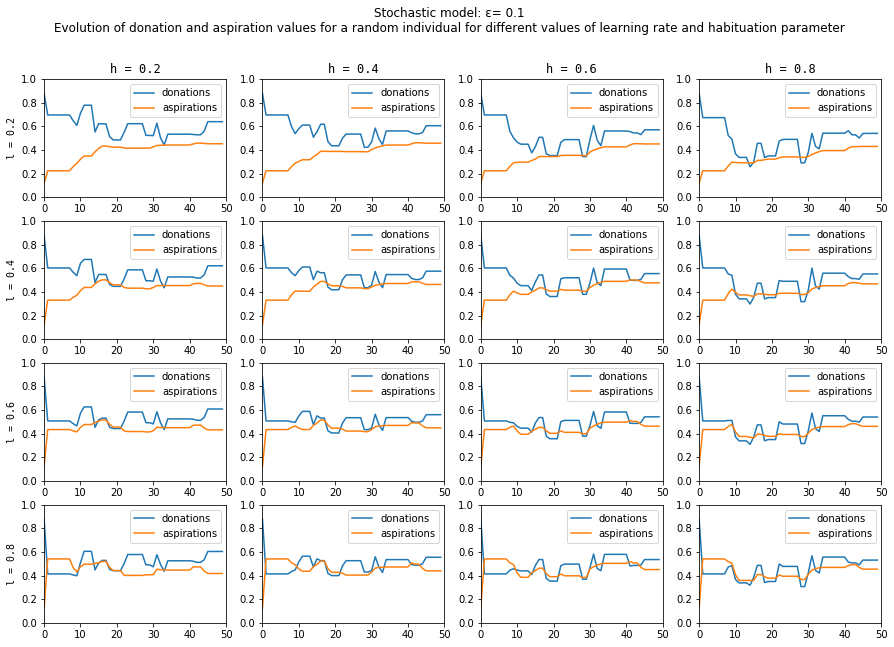

In [14]:
random.seed(0)
np.random.seed(0)
epsilon = 0.1  # 'trembling hand' parameter
end = 1.0
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
I = 50   # number of iterations
randomp =  random.randint(0, N)

sp = 1
spi = 1
spe = 1
for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
		### Creating an environment with N pairs of individuals ###
		M = I	# number of iterations
		pairs = []
		for i in range(N):
			pairs.append(PairEnvironment())
			if( i == randomp ):
				pairs[i].set_random_ind(True)

		stochastic_donations_ep = []	# List with all the donations for stochastic model
		stochastic_aspirations_ep = []	# List with all the aspirations for stochastic model

		while( M > 0 ):
			don_mean = 0.0
			asp_mean = 0.0

			### STEP 1. Each pair make the donation ###
            
			for p in pairs:
				don_d, asp_d, don_r, asp_r = p.get_state(False)
				p.dictator.my_donations.append(don_d)		# me interesa la evolución de cada individuo de cada pareja así que todo esto lo guardo
				p.dictator.my_aspirations.append(asp_d)		# idem
				p.recipient.my_donations.append(don_r)		# idem
				p.recipient.my_aspirations.append(asp_r)	# idem
				don_mean += don_r
				asp_mean += asp_r
				p.make_stoch_donation(learn, habit, epsilon)
			stochastic_donations_ep.append(don_mean / N)		# todas las donaciones (en cada make_donation() sólo se actualiza la donación del recipient)
			stochastic_aspirations_ep.append(asp_mean / N)		# todas las aspiraciones (en cada make_donation() sólo se actualiza la aspiración del recipient)

			### STEP 2. Shuffling the pairs and swapping the roles (inside ind_exchange) randomly ###
			exchanges = random.sample(range(N), N)
			index = list(range(N))

			for (i, j) in zip(exchanges, index):
				if (i == j):
					pairs[i].swap_roles()
					index.remove(i)
					exchanges.remove(i)
				else:
					pairs[i].ind_exchange(pairs[j])
					exchanges.remove(i)
					index.remove(i)
					exchanges.remove(j)
					index.remove(j)

			M -= 1

			### We go to STEP 1 again ###


        ########################################################
        ##############   Donation and aspiration ###############
        ##############      mean evolution       ###############
        ########################################################
            
		plt.figure(3, figsize=[15,10])
		plt.subplot(len(l), len(h), sp)
		sp += 1
		plt.plot(list(range(I)), stochastic_donations_ep, label='donations')
		plt.plot(list(range(I)), stochastic_aspirations_ep, label='aspirations')
		plt.axis([0, I, 0, 1])
		plt.xticks(fontsize='small')
		plt.yticks(fontsize='small')
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Stochastic model: \u03B5= "+str(epsilon)+"\nDonations and aspirations mean evolution for different values of learning rate and habituation parameter")

        
		########################################################
		#########  Donation and aspiration evolution  ##########
		#########       for a random individual       ##########
		########################################################
   
		for p in pairs:
			if(p.is_random_ind()): 
				random_pair = p
                
		donationss_ep = random_pair.dictator.my_donations
		aspirationss_ep = random_pair.dictator.my_aspirations
		plt.figure(4, figsize=[15,10])
		plt.subplot(len(l), len(h), spi)
		spi += 1
		plt.plot(list(range(I)), donationss_ep)
		plt.plot(list(range(I)), aspirationss_ep)
        
        
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.axis([0, I, 0, 1])
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Stochastic model: \u03B5= "+str(epsilon)+"\nEvolution of donation and aspiration values for a random individual for different values of learning rate and habituation parameter")



plt.show()

Now we can compare results obtained for both values of epsilon

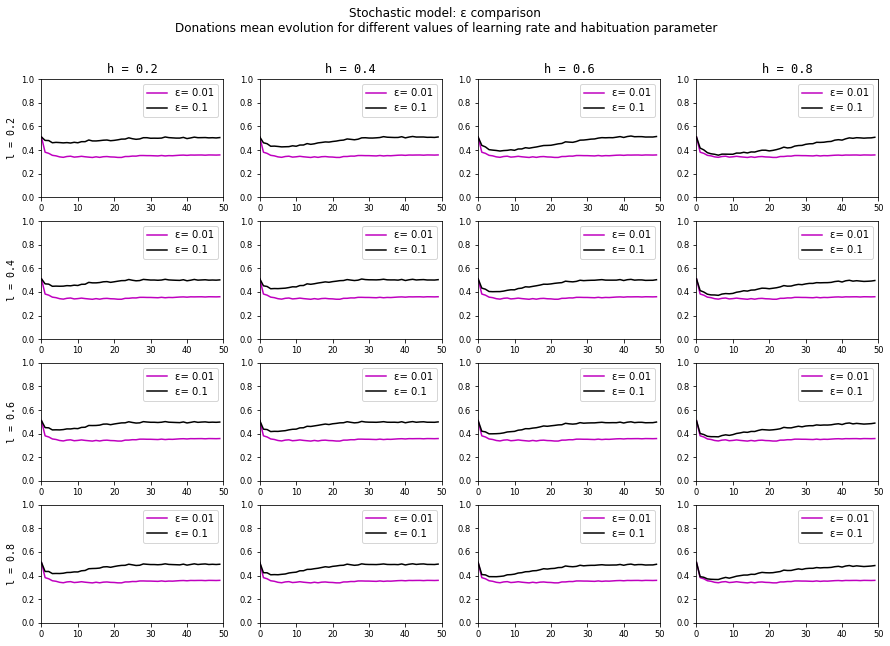

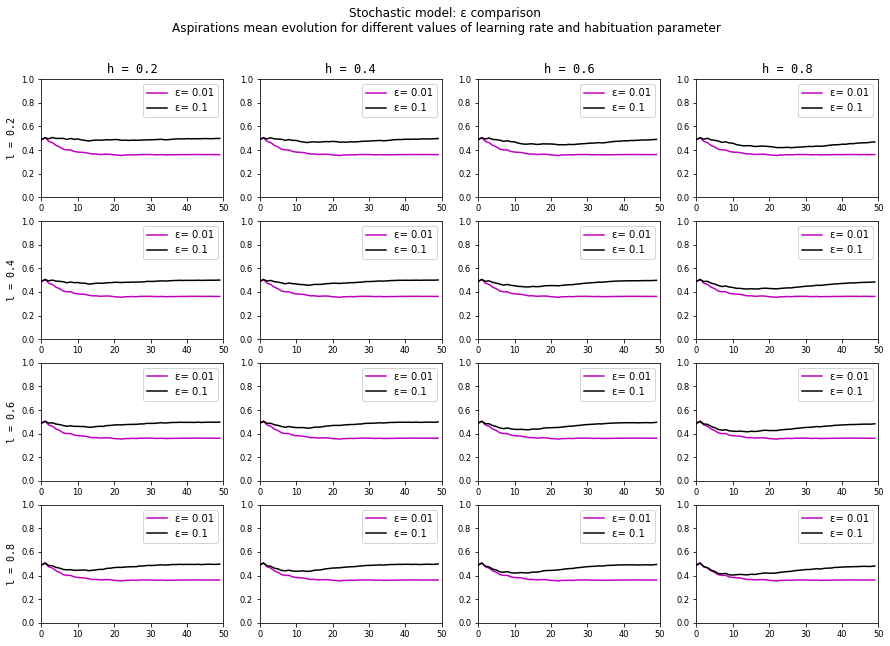

In [13]:
random.seed(0)
np.random.seed(0)
epsilon = 0.1  # 'trembling hand' parameter
end = 1.0
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
I = 50   # number of iterations
randomp =  random.randint(0, N)

spd = 1
spa = 1

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
		### Creating an environment with N pairs of individuals ###
		M = I	# number of iterations
		pairs = []
		for i in range(N):
			pairs.append(PairEnvironment())
			if( i == randomp ):
				pairs[i].set_random_ind(True)

		stochastic_donations_ep = []	# List with all the donations for stochastic model
		stochastic_aspirations_ep = []	# List with all the aspirations for stochastic model

		while( M > 0 ):
			don_mean = 0.0
			asp_mean = 0.0

			### STEP 1. Each pair make the donation ###
            
			for p in pairs:
				don_d, asp_d, don_r, asp_r = p.get_state(False)
				p.dictator.my_donations.append(don_d)		# me interesa la evolución de cada individuo de cada pareja así que todo esto lo guardo
				p.dictator.my_aspirations.append(asp_d)		# idem
				p.recipient.my_donations.append(don_r)		# idem
				p.recipient.my_aspirations.append(asp_r)	# idem
				don_mean += don_r
				asp_mean += asp_r
				p.make_stoch_donation(learn, habit, epsilon)
			stochastic_donations_ep.append(don_mean / N)		# todas las donaciones (en cada make_donation() sólo se actualiza la donación del recipient)
			stochastic_aspirations_ep.append(asp_mean / N)		# todas las aspiraciones (en cada make_donation() sólo se actualiza la aspiración del recipient)

			### STEP 2. Shuffling the pairs and swapping the roles (inside ind_exchange) randomly ###
			exchanges = random.sample(range(N), N)
			index = list(range(N))

			for (i, j) in zip(exchanges, index):
				if (i == j):
					pairs[i].swap_roles()
					index.remove(i)
					exchanges.remove(i)
				else:
					pairs[i].ind_exchange(pairs[j])
					exchanges.remove(i)
					index.remove(i)
					exchanges.remove(j)
					index.remove(j)

			M -= 1

			### We go to STEP 1 again ###

            
        ########################################################
        ##########       Donation mean evolution     ###########
        ##########       for different epsilons      ###########
        ########################################################
        
		plt.figure(5, figsize=[15,10])
		plt.subplot(len(l), len(h), spd)
		spd += 1
		plt.plot(list(range(I)), stochastic_donations, 'm', label='\u03B5= 0.01')
		plt.plot(list(range(I)), stochastic_donations_ep, 'k', label='\u03B5= 0.1')
		plt.axis([0, I, 0, 1])
		plt.xticks(fontsize='small')
		plt.yticks(fontsize='small')
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.legend(['\u03B5= 0.01', '\u03B5= 0.1'], loc="best")
		plt.suptitle("Stochastic model: \u03B5 comparison \nDonations mean evolution for different values of learning rate and habituation parameter")

        ########################################################
        #########       Aspiration mean evolution     ##########
        ##########       for different epsilons      ###########
        ########################################################
        
		plt.figure(6, figsize=[15,10])
		plt.subplot(len(l), len(h), spa)
		spa += 1
		plt.plot(list(range(I)), stochastic_aspirations, 'm', label='\u03B5= 0.01')
		plt.plot(list(range(I)), stochastic_aspirations_ep, 'k', label='\u03B5= 0.1')
		plt.axis([0, I, 0, 1])
		plt.xticks(fontsize='small')
		plt.yticks(fontsize='small')
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.legend(['\u03B5= 0.01', '\u03B5= 0.1'], loc="best")
		plt.suptitle("Stochastic model: \u03B5 comparison \nAspirations mean evolution for different values of learning rate and habituation parameter")



## Model extensions: envious agents and free-riders

### 0 free-riders and probability of being envious equal to 0.05

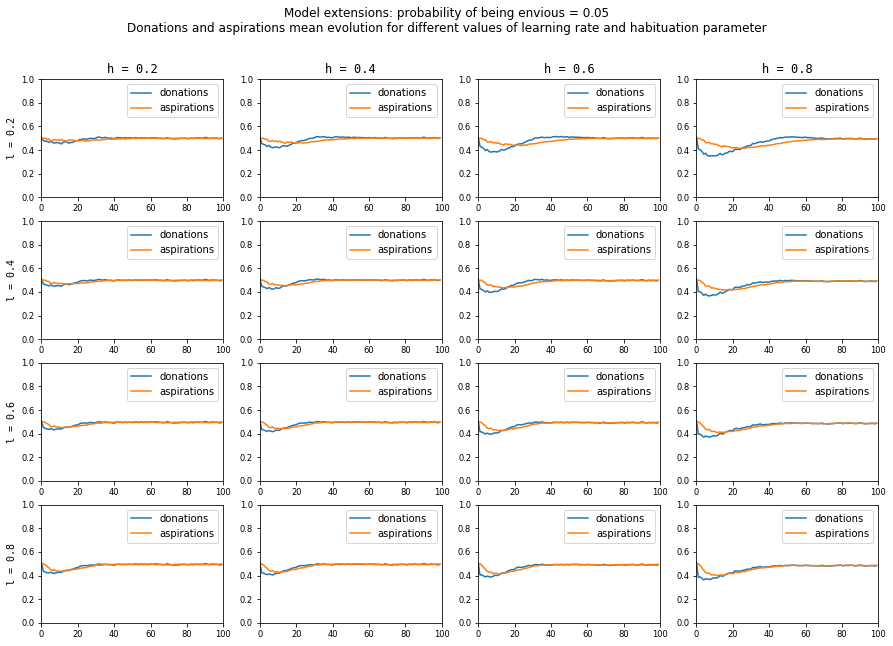

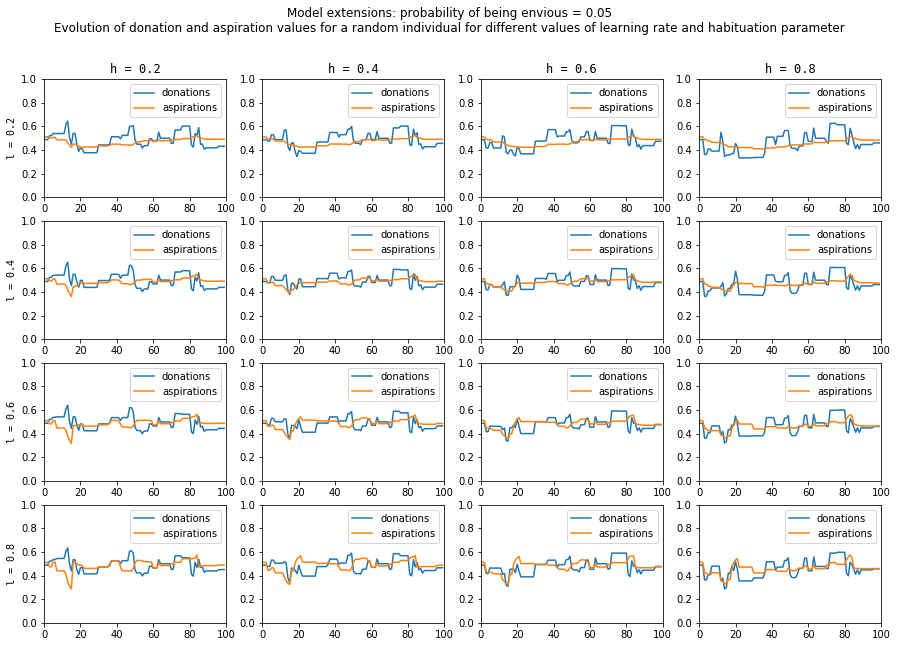

In [21]:
random.seed(0)
np.random.seed(0)
epsilon = 0.1  # 'trembling hand' parameter
end = 1.0
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
I = 100   # number of iterations
randomp =  random.randint(0, N)
fr = 0  # number of free-riders
envious_prob = 0.05  # probability of being envious

sp = 1
spi = 1

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
		### Creating an environment with N pairs of individuals ###
		M = I		# number of iterations
		pairs = []		# list of pairs
		for i in range(N):
			pairs.append(PairEnvironment())
			if( i == randomp ):
				pairs[i].set_random_ind(True)

		envious_donations = []		# List with all the donations for stochastic model
		envious_aspirations = []	# List with all the aspirations for stochastic model


		## Changing the individuals making them have a probability of being envious ##
		envious_pairs = [1] * int(N * envious_prob) + [0] * int(N * (1 - envious_prob))
		random.shuffle(envious_pairs)
		for (env, p) in zip(envious_pairs, pairs):
			if env:
				p.set_envious(True)

		## Changing the individuals making them have a concrete number of free-riders ##
		free_rider = []
		for i in range(fr):
			free_rider.append(random.randint(0, N-1))

		for i in free_rider:
			pairs[i].set_free_rider(True) # IndexError: list index out of range !!


		while( M > 0 ):
			don_mean = 0.0	# in every iteration we calculate the mean of all the donations
			asp_mean = 0.0	# in every iteration we calculate the mean of all the aspirations

			### STEP 1. Each pair make the donation ###
			for p in pairs:
				don_d, asp_d, don_r, asp_r = p.get_state(False)
				p.dictator.my_donations.append(don_d)		# me interesa la evolución de cada individuo de cada pareja así que todo esto lo guardo
				p.dictator.my_aspirations.append(asp_d)		# idem
				p.recipient.my_donations.append(don_r)		# idem
				p.recipient.my_aspirations.append(asp_r)	# idem
				don_mean += don_r
				asp_mean += asp_r
				## if the dictator is a free-rider, make a free-rider donation ##
				if p.is_free_rider():
					p.make_freerider_donation(learn, habit, epsilon)
				else:
					## else, if the dictator is envious, make an envious donation ##
					if p.is_envious():
						p.make_envious_donation(learn, habit, epsilon)
					## else, make an stochastic donation ##
					else:
						p.make_stoch_donation(learn, habit, epsilon)

			envious_donations.append(don_mean / N)		# todas las donaciones (en cada make_donation() sólo se actualiza la donación del recipient)
			envious_aspirations.append(asp_mean / N)	# todas las aspiraciones (en cada make_donation() sólo se actualiza la aspiración del recipient)

			### STEP 2. Shuffling the pairs and swapping the roles (inside ind_exchange) randomly ###
			exchanges = random.sample(range(N), N)
			index = list(range(N))

			for (i, j) in zip(exchanges, index):
				if (i == j):
					pairs[i].swap_roles()
					index.remove(i)
					exchanges.remove(i)
				else:
					pairs[i].ind_exchange(pairs[j])
					exchanges.remove(i)
					index.remove(i)
					exchanges.remove(j)
					index.remove(j)
			M -= 1

			### We go to STEP 1 again ###


        ########################################################
        ##############   Donation and aspiration ###############
        ##############      mean evolution       ###############
        ########################################################
            
		plt.figure(7, figsize=[15,10])
		plt.subplot(len(l), len(h), sp)
		sp += 1
		plt.plot(list(range(I)), envious_donations, label='donations')
		plt.plot(list(range(I)), envious_aspirations, label='aspirations')
		plt.axis([0, I, 0, 1])
		plt.xticks(fontsize='small')
		plt.yticks(fontsize='small')
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Model extensions: probability of being envious = 0.05\nDonations and aspirations mean evolution for different values of learning rate and habituation parameter")

        
		########################################################
		#########  Donation and aspiration evolution  ##########
		#########       for a random individual       ##########
		########################################################
  
		for p in pairs:
			if(p.is_random_ind()): 
				random_pair = p
                
		donationsv = random_pair.dictator.my_donations
		aspirationsv = random_pair.dictator.my_aspirations
		plt.figure(8, figsize=[15,10])
		plt.subplot(len(l), len(h), spi)
		spi += 1
		plt.plot(list(range(I)), donationsv)
		plt.plot(list(range(I)), aspirationsv)
        
        
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.axis([0, I, 0, 1])
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Model extensions: probability of being envious = 0.05\nEvolution of donation and aspiration values for a random individual for different values of learning rate and habituation parameter")



plt.show()

### 1 free-rider and probability of being envious equal to 0.05

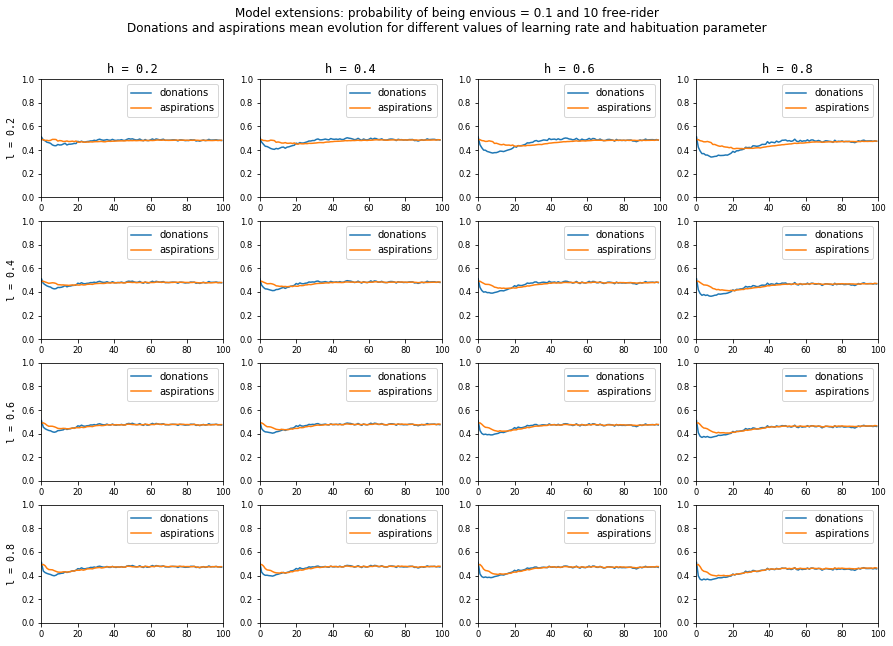

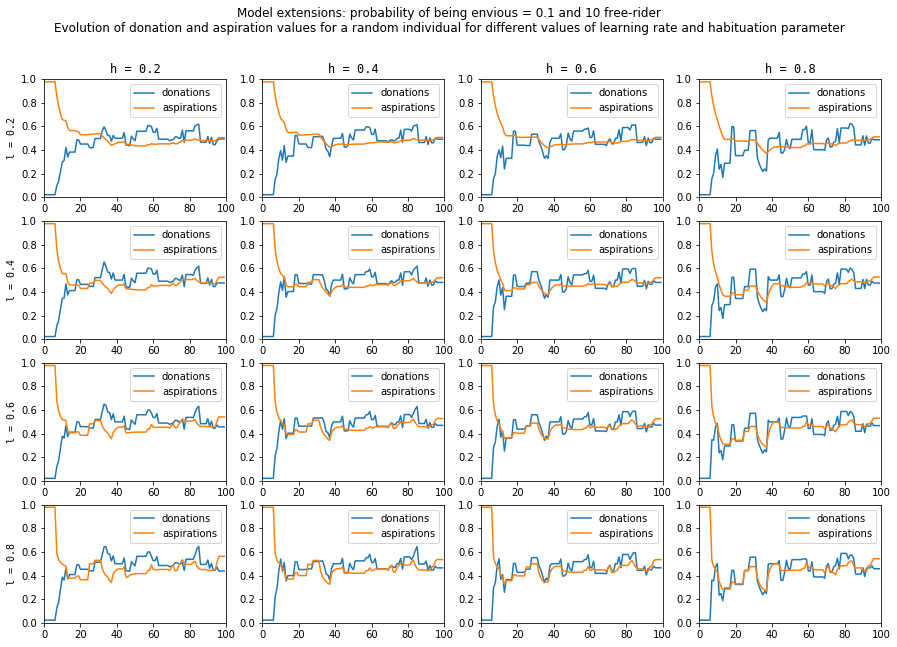

In [24]:
random.seed(0)
np.random.seed(0)
epsilon = 0.1  # 'trembling hand' parameter
end = 1.0
l = [0.2, 0.4, 0.6, 0.8]
h = [0.2, 0.4, 0.6, 0.8]
N = 500  # number of pairs
I = 100   # number of iterations
randomp =  random.randint(0, N)
fr = 10  # number of free-riders
envious_prob = 0.1  # probability of being envious

sp = 1
spi = 1

for learn in l:
	for habit in h:
		random.seed(0)
		np.random.seed(0)
		### Creating an environment with N pairs of individuals ###
		M = I		# number of iterations
		pairs = []		# list of pairs
		for i in range(N):
			pairs.append(PairEnvironment())
			if( i == randomp ):
				pairs[i].set_random_ind(True)

		envious_donations = []		# List with all the donations for stochastic model
		envious_aspirations = []	# List with all the aspirations for stochastic model


		## Changing the individuals making them have a probability of being envious ##
		envious_pairs = [1] * int(N * envious_prob) + [0] * int(N * (1 - envious_prob))
		random.shuffle(envious_pairs)
		for (env, p) in zip(envious_pairs, pairs):
			if env:
				p.set_envious(True)

		## Changing the individuals making them have a concrete number of free-riders ##
		free_rider = []
		for i in range(fr):
			free_rider.append(random.randint(0, N-1))

		for i in free_rider:
			pairs[i].set_free_rider(True) # IndexError: list index out of range !!


		while( M > 0 ):
			don_mean = 0.0	# in every iteration we calculate the mean of all the donations
			asp_mean = 0.0	# in every iteration we calculate the mean of all the aspirations

			### STEP 1. Each pair make the donation ###
			for p in pairs:
				don_d, asp_d, don_r, asp_r = p.get_state(False)
				p.dictator.my_donations.append(don_d)		# me interesa la evolución de cada individuo de cada pareja así que todo esto lo guardo
				p.dictator.my_aspirations.append(asp_d)		# idem
				p.recipient.my_donations.append(don_r)		# idem
				p.recipient.my_aspirations.append(asp_r)	# idem
				don_mean += don_r
				asp_mean += asp_r
				## if the dictator is a free-rider, make a free-rider donation ##
				if p.is_free_rider():
					p.make_freerider_donation(learn, habit, epsilon)
				else:
					## else, if the dictator is envious, make an envious donation ##
					if p.is_envious():
						p.make_envious_donation(learn, habit, epsilon)
					## else, make an stochastic donation ##
					else:
						p.make_stoch_donation(learn, habit, epsilon)

			envious_donations.append(don_mean / N)		# todas las donaciones (en cada make_donation() sólo se actualiza la donación del recipient)
			envious_aspirations.append(asp_mean / N)	# todas las aspiraciones (en cada make_donation() sólo se actualiza la aspiración del recipient)

			### STEP 2. Shuffling the pairs and swapping the roles (inside ind_exchange) randomly ###
			exchanges = random.sample(range(N), N)
			index = list(range(N))

			for (i, j) in zip(exchanges, index):
				if (i == j):
					pairs[i].swap_roles()
					index.remove(i)
					exchanges.remove(i)
				else:
					pairs[i].ind_exchange(pairs[j])
					exchanges.remove(i)
					index.remove(i)
					exchanges.remove(j)
					index.remove(j)
			M -= 1

			### We go to STEP 1 again ###


        ########################################################
        ##############   Donation and aspiration ###############
        ##############      mean evolution       ###############
        ########################################################
            
		plt.figure(7, figsize=[15,10])
		plt.subplot(len(l), len(h), sp)
		sp += 1
		plt.plot(list(range(I)), envious_donations, label='donations')
		plt.plot(list(range(I)), envious_aspirations, label='aspirations')
		plt.axis([0, I, 0, 1])
		plt.xticks(fontsize='small')
		plt.yticks(fontsize='small')
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Model extensions: probability of being envious = "+str(envious_prob)+" and "+str(fr)+" free-rider\nDonations and aspirations mean evolution for different values of learning rate and habituation parameter")

        
		########################################################
		#########  Donation and aspiration evolution  ##########
		#########       for a random individual       ##########
		########################################################
  
		for p in pairs:
			if(p.is_random_ind()): 
				random_pair = p
                
		donationsv = random_pair.dictator.my_donations
		aspirationsv = random_pair.dictator.my_aspirations
		plt.figure(8, figsize=[15,10])
		plt.subplot(len(l), len(h), spi)
		spi += 1
		plt.plot(list(range(I)), donationsv)
		plt.plot(list(range(I)), aspirationsv)
        
        
		if(habit == 0.2): plt.ylabel('l = '+str(learn), family='monospace')
		if(learn == 0.2): plt.title('h = '+str(habit), family='monospace')
		plt.axis([0, I, 0, 1])
		plt.legend(['donations', 'aspirations'], loc="best")
		plt.suptitle("Model extensions: probability of being envious = "+str(envious_prob)+" and "+str(fr)+" free-rider\nEvolution of donation and aspiration values for a random individual for different values of learning rate and habituation parameter")



plt.show()